In [36]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold

In [37]:
# Load dataset
dataset =  pd.read_csv('Prediction of students performance.csv')
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [38]:
# Code categorical features & targets
for i in dataset.select_dtypes(include='object').columns:
    dataset[i] = dataset[i].astype('category').cat.codes

# Seperate x, y of dataset
x = dataset.drop(['Target'], axis = 1)
y = dataset['Target'] 

# apply normalization (mean/std)
for column in x: 
    x[column] = (x[column] - x[column].mean()) / x[column].std()

# Split dataset into train, valid & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)
# Split train data to Train & Valid
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, shuffle = True)


In [39]:
# Linear SVM
svm = LinearSVC(random_state = 0, tol = 0.1, max_iter = 10000)
svm.fit(x_train, y_train)

# Apply on train data
y_pred_train = svm.predict(x_train)
print(f'Train acuuracy: {accuracy_score(y_train, y_pred_train)*100 :.3f}')

# Apply on test data
y_pred = svm.predict(x_test)
print(f'Test acuuracy: {accuracy_score(y_test, y_pred)*100 :.3f}')

# Find Support Vectors
decision_function = svm.decision_function(x_train)
support_vector_indices = np.unique(np.where(np.abs(decision_function) <= 1+1e-5)[0])
support_vectors = x_train.iloc[support_vector_indices]
print(f"\nNumber of support vectors = {support_vector_indices.shape[0]}")

Train acuuracy: 77.423
Test acuuracy: 76.130

Number of support vectors = 2287


Highest accuracy on validation set is 77.903 for C = 4


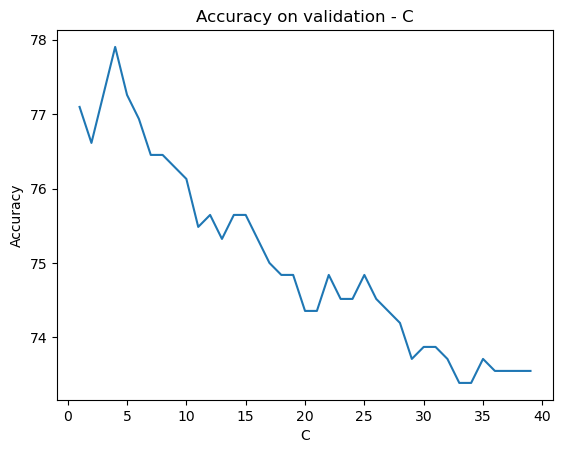

Training accuracy:  88.611
Test accuracy:  74.473
Number of support vectors = 1434


In [40]:
# soft - SVM
max_acc = 0
opt_C = 0
acc_list = []
# Find the optimal C according to validation accuracy
for i in range(1,40):
    svm = SVC(C = i, tol = 1e-4, max_iter = -1)
    svm.fit(x_train, y_train)
    y_valid_pred = svm.predict(x_valid)
    valid_acc = accuracy_score(y_valid, y_valid_pred)
    acc_list.append(valid_acc*100)
    if (valid_acc > max_acc):
        max_acc = valid_acc
        opt_C = i
print(f"Highest accuracy on validation set is {max_acc*100:.3f} for C = {opt_C}")

# Plot Acc. - C
plt.plot(range(1, 40),acc_list)
plt.title("Accuracy on validation - C")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.show()

# Apply SVM on test data with founded optimal C and calc. test accuracy & Support Vectors
svm = SVC(C = opt_C, tol = 1e-4, max_iter = -1)
svm.fit(x_train, y_train)
y_test_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)
test_acc = accuracy_score(y_true=y_test, y_pred=y_test_pred)
train_acc = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print(f"Training accuracy: {train_acc*100: .3f}")
print(f"Test accuracy: {test_acc*100: .3f}")

# Find Support Vectors
print(f"Number of support vectors = {svm.support_vectors_.shape[0]}")

In [41]:
# Use RBF & Poly kernels
max_acc = 0
opt_kernel = 0
kernels = ['rbf', 'poly']

for i in kernels:
    for j in range(1,40):
        svm = SVC(kernel = i, C = j, degree = 3, gamma = 'scale', tol = 1e-4, max_iter = -1)
        svm.fit(x_train, y_train)
        y_valid_pred = svm.predict(x_valid)
        valid_acc = accuracy_score(y_valid, y_valid_pred)
        if (valid_acc > max_acc):
            max_acc = valid_acc
            opt_C = j
    print(f"Highest accuracy on validation set for {i} kernel is {max_acc*100:.3f} with C = {opt_C}")


# Apply SVM with optimal C & optimal kernel on train & test & calc. test & train accuracy
for i in kernels:
    svm = SVC(C = opt_C, kernel = i, tol = 1e-4, max_iter = -1)
    svm.fit(x_train, y_train)
    y_test_pred = svm.predict(x_test)
    y_train_pred = svm.predict(x_train)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, y_train_pred)
    print(f"Train accuracy is: {train_acc*100 :.3f} for {i} kernel")
    print(f"Test accuracy is {test_acc*100 :.3f} for {i} kernel")
    # Find Support Vectors
    print(f"Number of support vectors for {i} kernel = {svm.support_vectors_.shape[0]}")

Highest accuracy on validation set for rbf kernel is 77.903 with C = 4
Highest accuracy on validation set for poly kernel is 77.903 with C = 4
Train accuracy is: 88.611 for rbf kernel
Test accuracy is 74.473 for rbf kernel
Number of support vectors for rbf kernel = 1434
Train accuracy is: 86.470 for poly kernel
Test accuracy is 71.160 for poly kernel
Number of support vectors for poly kernel = 1473


Highest accuracy on validation set is  77.903 for C = 4


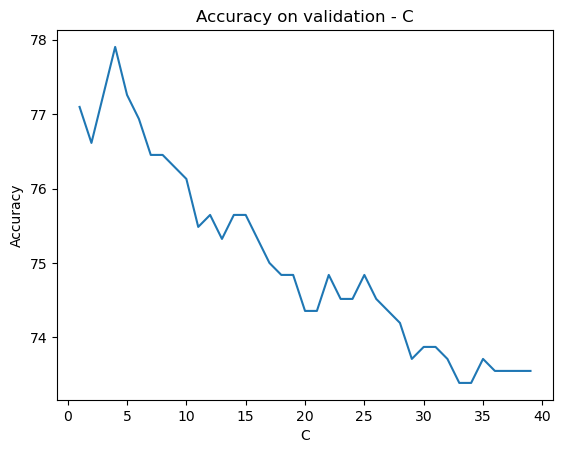

Train accuracy:  88.611
Test accuracy:  74.473
Number of support vectors = 1434


In [42]:
# Combination of soft & the best kernel (RBF)
max_acc = 0
opt_C = 0
acc_list = list()

for i in range(1, 40):
    svm = SVC(C = i, kernel = 'rbf', gamma = 'scale', tol = 1e-4, max_iter = -1)
    svm.fit(x_train, y_train)
    y_valid_pred = svm.predict(x_valid)
    valid_acc = accuracy_score(y_valid, y_valid_pred)
    acc_list.append(valid_acc*100)
    if (valid_acc > max_acc):
        max_acc = valid_acc
        opt_C = i
print(f"Highest accuracy on validation set is {max_acc*100: .3f} for C = {opt_C}")

# Plot Acc. - C
plt.plot(range(1,40),acc_list)
plt.title("Accuracy on validation - C")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.show()

# Apply SVM on test data with founded optimal C and calc. test accuracy & Support Vectors
svm = SVC(C = opt_C, tol = 1e-4, max_iter = -1)
svm.fit(x_train, y_train)
y_test_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)
test_acc = accuracy_score(y_test, y_test_pred)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_acc*100: .3f}")
print(f"Test accuracy: {test_acc*100: .3f}")

# Find Support Vectors
print(f"Number of support vectors = {svm.support_vectors_.shape[0]}")

In [48]:
# 3-fold cross validation
folds = KFold(3, shuffle = True)

for i, (train, test) in enumerate(folds.split(x_train, y_train)):
    print(f'Fold: {i}')

svm = SVC(C = 4, kernel= 'rbf')
svm.fit(x_train, y_train)
Y_train_pred = svm.predict(x_train)
acc = accuracy_score(y_train, Y_train_pred)
print(f'Train accuracy: {acc*100: .3f}')

Y_test_pred = svm.predict(x_test)
acc = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {acc*100: .3f}')
print(f"Number of support vectors = {svm.support_vectors_.shape[0]}")

Fold: 0
Fold: 1
Fold: 2
Train accuracy:  88.611
Test accuracy:  74.473
Number of support vectors = 1434
